In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/workspaces/ds-fall-2025-fri-1230/Week-03-EDA-and-Dashboards/data/movie_ratings.csv')
plt.style.use("dark_background")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212595 entries, 0 to 212594
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      212595 non-null  int64  
 1   movie_id     212595 non-null  int64  
 2   rating       212595 non-null  int64  
 3   timestamp    212595 non-null  object 
 4   age          212595 non-null  int64  
 5   gender       212595 non-null  object 
 6   occupation   212595 non-null  object 
 7   zip_code     212595 non-null  object 
 8   title        212595 non-null  object 
 9   year         212559 non-null  float64
 10  decade       212559 non-null  float64
 11  genres       212595 non-null  object 
 12  rating_year  212595 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 21.1+ MB


In [3]:
df.describe()

,user_id,movie_id,rating,age,year,decade,rating_year
count,212595.000000,212595.000000,212595.000000,212595.000000,212559.000000,212559.000000,212595.000000
mean,464.525643,390.545173,3.551048,32.771382,1987.563105,1982.602148,1997.469282
std,267.294662,312.312060,1.119645,11.452661,13.990727,13.687463,0.499057
min,1.000000,1.000000,1.000000,7.000000,1922.000000,1920.000000,1997.000000
25%,255.000000,164.000000,3.000000,24.000000,1984.000000,1980.000000,1997.000000
50%,450.000000,293.000000,4.000000,30.000000,1994.000000,1990.000000,1997.000000
75%,688.000000,568.000000,4.000000,40.000000,1996.000000,1990.000000,1998.000000
max,943.000000,1682.000000,5.000000,73.000000,1998.000000,1990.000000,1998.000000


In [4]:
df.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip_code,title,year,decade,genres,rating_year
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105,Kolya (1996),1996.0,1990.0,Comedy,1997
1,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Crime,1998
2,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Film-Noir,1998
3,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Mystery,1998
4,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Thriller,1998


Text(0.5, 1.0, 'Breakdown Of Movies By Genre')

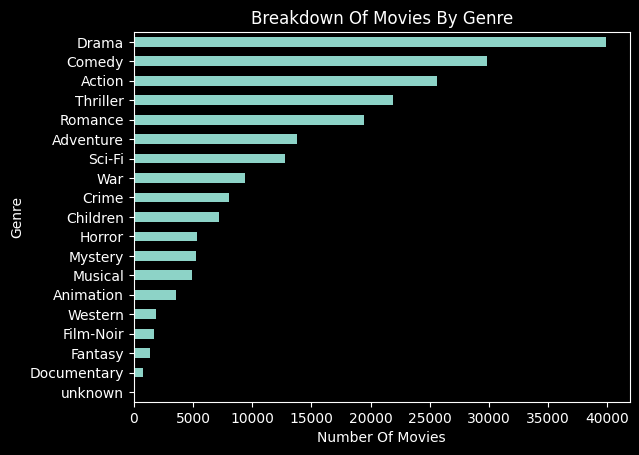

In [5]:
new_df = df['genres'].value_counts()
sorted_df = new_df.sort_values()
chart1 = sorted_df.plot(kind='barh')
chart1.set_xlabel("Number Of Movies")
chart1.set_ylabel("Genre")
chart1.set_title("Breakdown Of Movies By Genre")

The above graph shows the distribution of movies by genre. Details include:
- Drama dominates the dataset with around 40,000 movies, followed by Comedy and Action.
- Genres that fall in the middle include Thriller, Romance, Adventure, and Sci-Fi (each in the range of 10,000–25,000).
- The smallest genres such as Animation, Western, Film-Noir, Fantasy, and Documentary have less than 5,000 movies each
- An “unknown” genre exists but is extremely minimal.

In general, the data provides important context on the number of movies in each genre which can be important when conducting further analysis.

Text(0.5, 1.0, 'Top 10 Genres With The Highest Average Ratings')

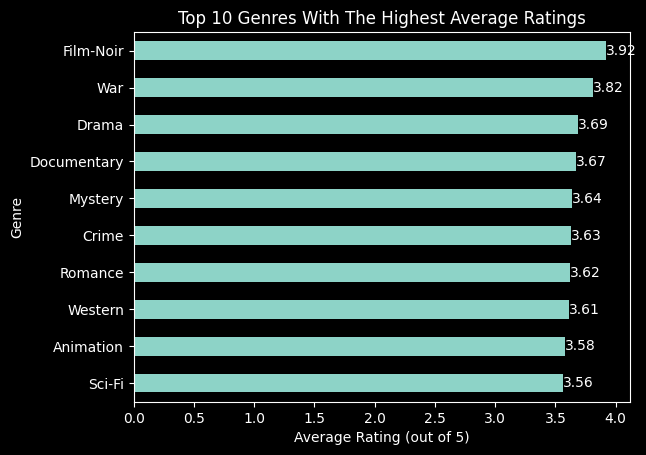

In [6]:
viewer_feelings = df.groupby('genres')['rating'].mean()
sorted = viewer_feelings.sort_values()
top10 = sorted.tail(10)
chart2 = top10.plot(kind = 'barh')

chart2.set_xlabel("Average Rating (out of 5)")
chart2.set_ylabel("Genre")
chart2.bar_label(chart2.containers[0], fmt='%.2f')
chart2.set_title("Top 10 Genres With The Highest Average Ratings")

The above chart shows the genres with the highest average movie ratings (out of 5). Specifics include:
- Film-Noir has the highest average rating (3.92), implying that the quality of movies in this genre is great and appreciated by critics and viewers.
- Second are War films with an average rating of 3.82, suggesting the strong narratives that inspire war stories being sucessful in cinema.
- Drama (3.69) and Documentary (3.67) also are highly ranked, indicating audience's resonating with realistic and story based films.
- Genres such as Mystery, Crime, Romance, and Western fall in the 3.6–3.64 range, showing their success with movie goers.
- Animation (3.58) and Sci-Fi (3.56) end out the top 10, proving how more creative and visual mediums are enjoyed by people.

These findings are interesting because Drama and Comedy dominate in quantity (from my previous chart), but smaller, more niche genres such as Film-Noir and War actually have the highest average ratings, reflecting quality over quantity.

Text(0.5, 1.0, 'Change In Average Movie Ratings By Year')

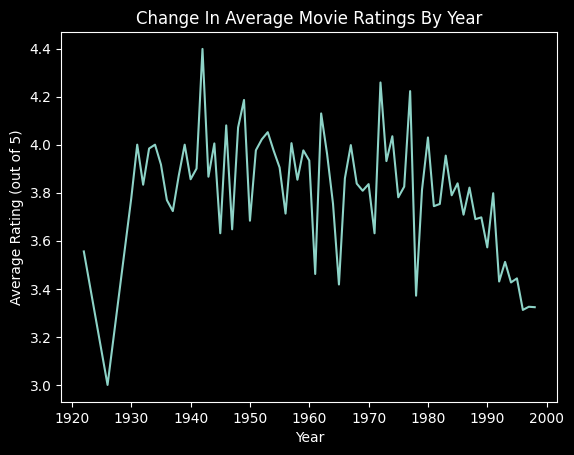

In [7]:
rating_by_year = df.groupby('year')['rating'].mean()
chart3 = rating_by_year.plot()

chart3.set_xlabel("Year")
chart3.set_ylabel("Average Rating (out of 5)")
chart3.set_title("Change In Average Movie Ratings By Year")

The above graph shows how average movie ratings changed over time (1920–2000). Key details include:

- There was a steady increase in ratings from the 1930s and the peak of cinema was actually in the 1940s.
- Then, from the 1950s to the 1980s, ratings rapidly changed but mostly remained between 3.7–4.0.
- In more recent times, there has been a slow decline in the quality of movies indicating film studios potentially prioritizing profits over good movies.

To summarize, the graph suggests that early 1900s have the higher-rated films, while more recent decades provided lower quality and lower rated films.

Text(0.5, 1.0, '5 Best Rated Movies (Min 50 Ratings)')

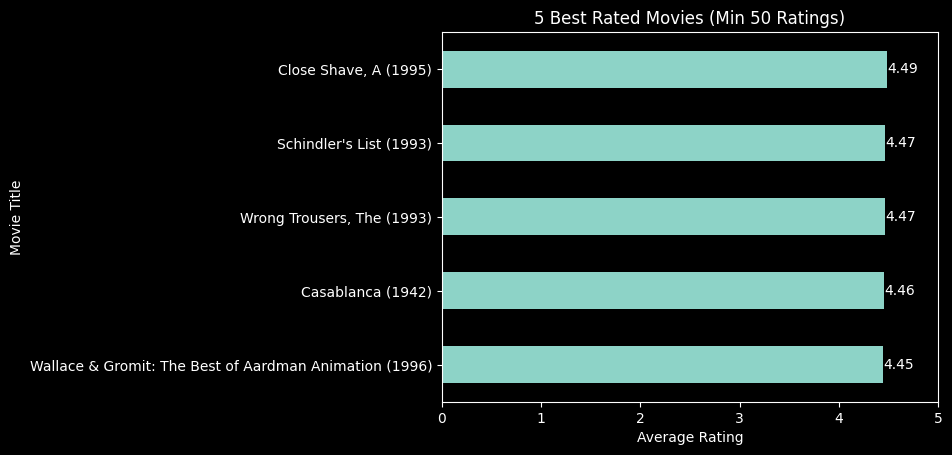

In [8]:
movie = df.groupby(['title','movie_id'])
grouped = movie['rating'].agg(['count', 'mean'])
filtered = grouped[grouped['count'] >= 50]
ordered = filtered['mean'].sort_values(ascending = False)
final = ordered.head(5)
finalized = final.reset_index(level='movie_id', drop=True)
finalized = finalized[::-1]
chart4 = finalized.plot(kind = 'barh')

chart4.set_xlabel("Average Rating")
chart4.set_ylabel("Movie Title")
chart4.bar_label(chart4.containers[0], fmt='%.2f')
chart4.set_xlim(0, 5)
chart4.set_title("5 Best Rated Movies (Min 50 Ratings)")

Text(0.5, 1.0, '5 Best Rated Movies (Min 150 Ratings)')

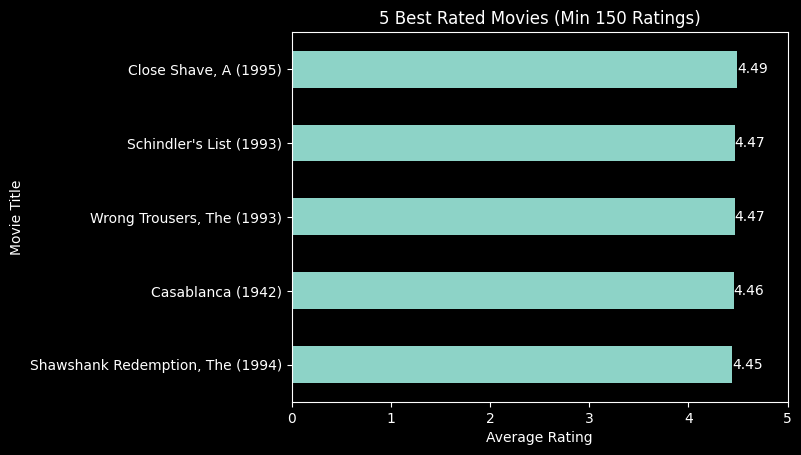

In [9]:
filtered2 = grouped[grouped['count'] >= 150]
ordered2 = filtered2['mean'].sort_values(ascending = False)
final2 = ordered2.head(5)
finalized2 = final2.reset_index(level='movie_id', drop=True)
finalized2 = finalized2[::-1]
chart5 = finalized2.plot(kind = 'barh')

chart5.set_xlabel("Average Rating")
chart5.set_ylabel("Movie Title")
chart5.bar_label(chart5.containers[0], fmt='%.2f')
chart5.set_xlim(0, 5)
chart5.set_title("5 Best Rated Movies (Min 150 Ratings)")

The above two charts both highlight the top 5 highest-rated movies, but they differ in the minimum number of ratings required.

- For the first chart (a 50-rating minimum), the top movies are A Close Shave (1995), Schindler’s List (1993), The Wrong Trousers (1993), Casablanca (1942), and Wallace & Gromit: The Best of Aardman Animation (1996).
- For the second chart (a stricter 150-rating minimum), the list is: A Close Shave (1995), Schindler’s List (1993), The Wrong Trousers (1993), and Casablanca (1942), and The Shawshank Redemption (1994).

Comparing the two charts reveals that when fewer ratings are allowed, more special-interest films that have loyal followings can appear among the top-rated. However, when filtering by a bigger number of ratings, the list contains more popular and critically acclaimed films.